In [1]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta
import numpy as np

%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.metrics import silhouette_score
import itertools

In [2]:
path = Path('.')
dataframes = {}
columns =  ['dates','subframe_n','subframe_ind','rnti','direction','mcs']
folder = 'new_A'
for p in list(path.glob(folder)):
    for file in tqdm(list(p.glob('*.csv*'))[:5]):
        df = pd.read_csv(file, names = columns)
        with pd.option_context('mode.use_inf_as_null', True):
            df = df.dropna()#fillna(0)#dropna(subset=['subframe_ind', 'rnti', 'direction', 'mcs'], how='all')
        df[['subframe_ind', 'rnti', 'direction', 'mcs']] = df[['subframe_ind', 'rnti', 'direction', 'mcs']].astype(np.int)
        df.dates = pd.to_datetime(df.dates, format='%Y%m%d%H%M%S')
        dataframes[file.parts[-1]]=df#.sort_values('rnti').reset_index(drop = True)

df = pd.concat([dataframes[key] for key in dataframes.keys()])

100%|██████████| 5/5 [00:18<00:00,  3.69s/it]


In [3]:
df = df[(df.rnti > 10)&(df.rnti != 65535)]
df['date_delta'] = (df['dates'] - df['dates'].min())  / np.timedelta64(1,'s')

df = df.drop(columns = 'dates')
df = df.astype('int32')

In [4]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249577 entries, 0 to 257524
Data columns (total 6 columns):
subframe_n      int32
subframe_ind    int32
rnti            int32
direction       int32
mcs             int32
date_delta      int32
dtypes: int32(6)
memory usage: 68.7 MB
None
         subframe_n  subframe_ind          rnti     direction           mcs  \
count  2.249577e+06  2.249577e+06  2.249577e+06  2.249577e+06  2.249577e+06   
mean   4.486315e+02  4.816195e+00  2.358023e+04  5.322494e-01  9.623194e+00   
std    3.386540e+02  2.979588e+00  1.773641e+04  4.989590e-01  9.546208e+00   
min    0.000000e+00  0.000000e+00  1.100000e+01  0.000000e+00  0.000000e+00   
25%    9.400000e+01  2.000000e+00  8.777000e+03  0.000000e+00  2.000000e+00   
50%    4.230000e+02  5.000000e+00  2.168100e+04  1.000000e+00  6.000000e+00   
75%    7.470000e+02  8.000000e+00  2.987500e+04  1.000000e+00  1.700000e+01   
max    1.121000e+03  9.000000e+00  6.553400e+04  1.000000e+00  3.100000e+01   

 

,subframe_n,subframe_ind,rnti,direction,mcs,date_delta
0,28,4,46997,1,20,0
1,53,5,32000,1,20,1
2,85,3,45928,1,0,1
4,27,8,22109,1,4,2
5,67,0,7999,1,14,2


<IPython.core.display.Javascript object>


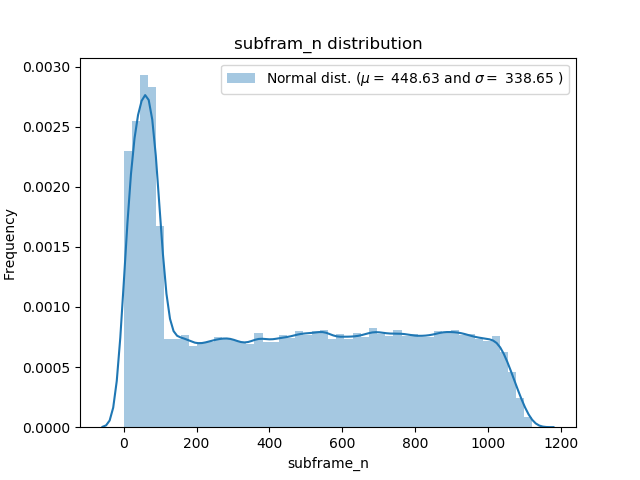


 mu = 448.63 and sigma = 338.65



<IPython.core.display.Javascript object>


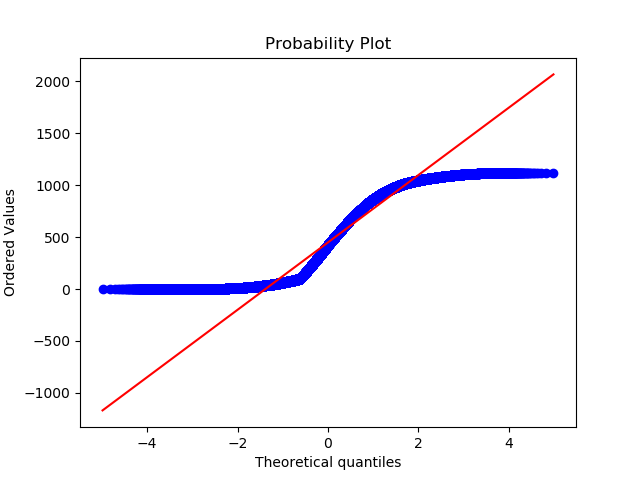

In [5]:
target = 'subframe_n'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('subfram_n distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


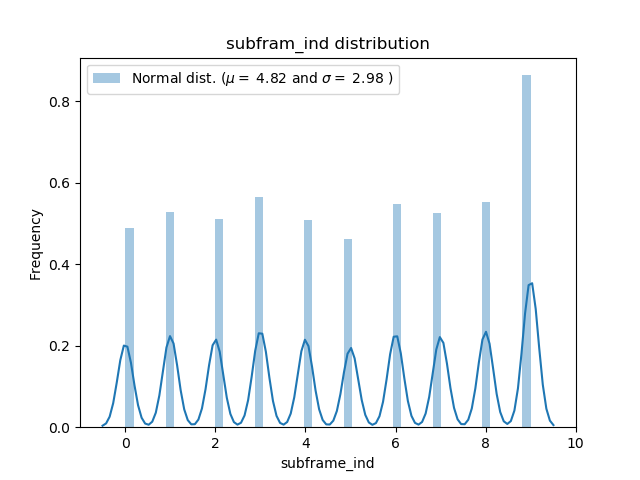


 mu = 4.82 and sigma = 2.98



<IPython.core.display.Javascript object>


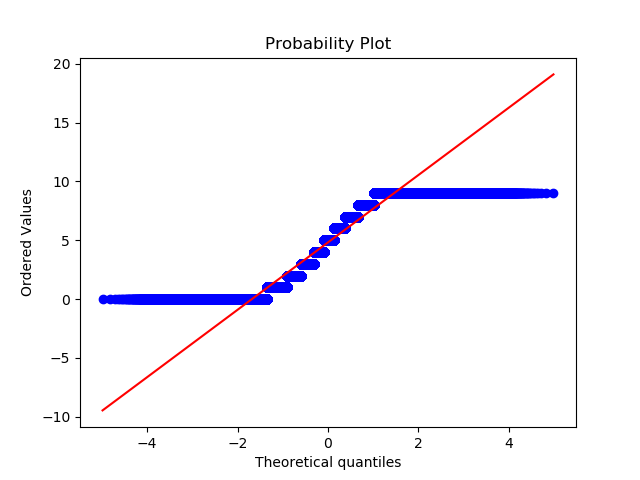

In [6]:
target = 'subframe_ind'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('subfram_ind distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


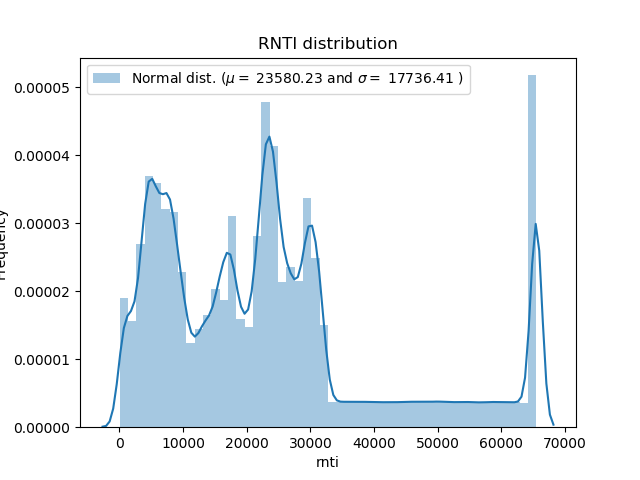


 mu = 23580.23 and sigma = 17736.41



<IPython.core.display.Javascript object>


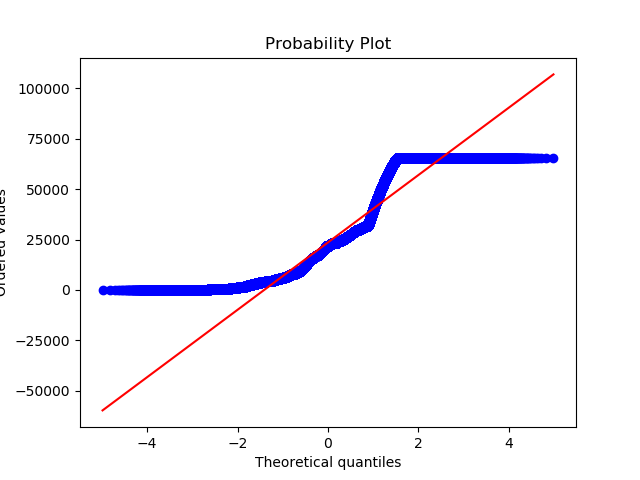

In [7]:
target = 'rnti'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RNTI distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


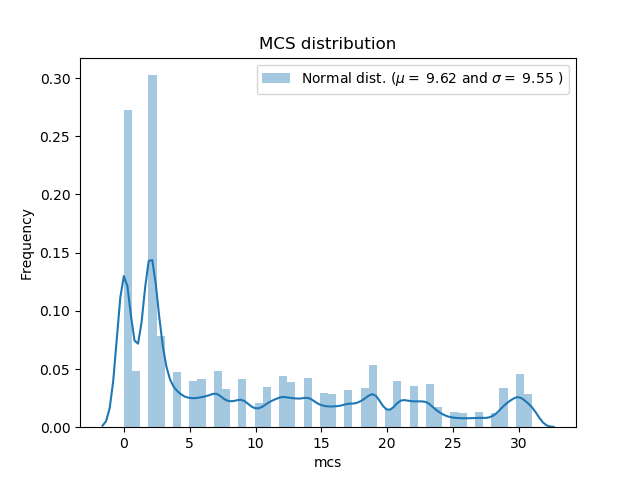


 mu = 9.62 and sigma = 9.55



<IPython.core.display.Javascript object>


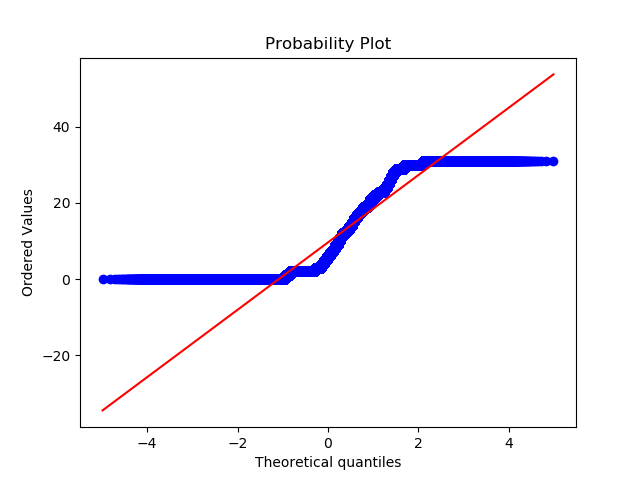

In [8]:
target = 'mcs'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MCS distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


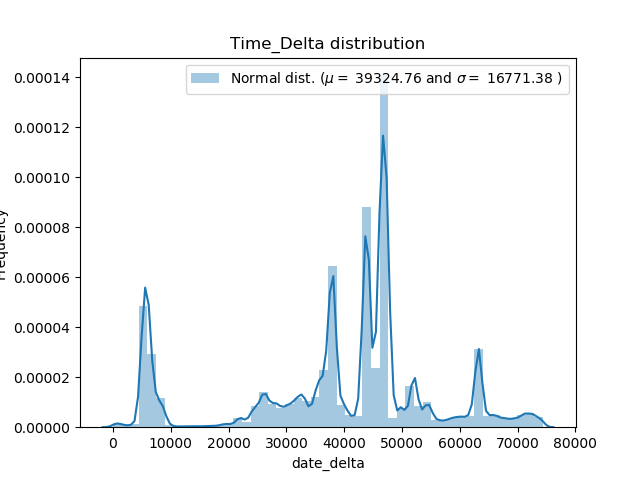


 mu = 39324.76 and sigma = 16771.38



<IPython.core.display.Javascript object>


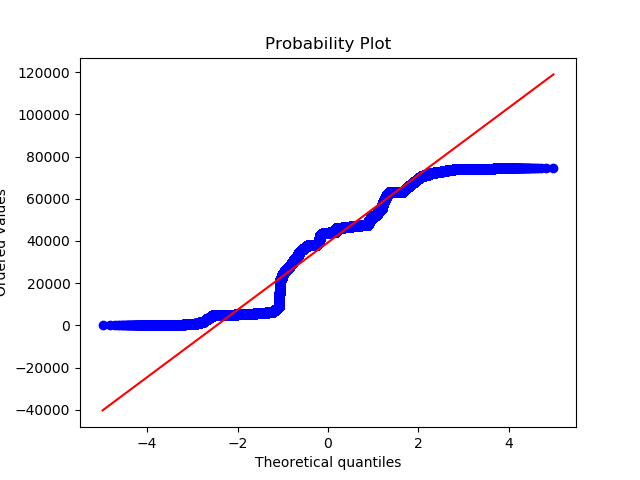

In [9]:
target = 'date_delta'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Time_Delta distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

<IPython.core.display.Javascript object>


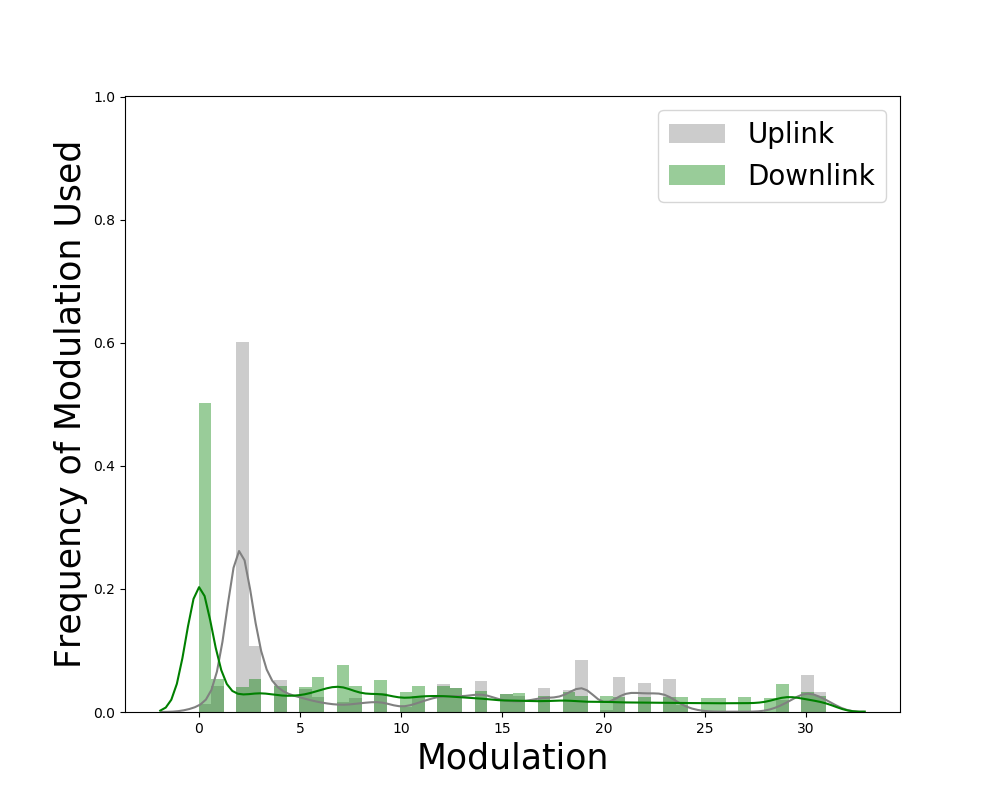

C:\Users\yurin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1, top=1.0
  ret = ax.set_ylim(*args, **kwargs)


In [12]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,8),)
plt.ylim(1)
ax=sns.distplot(df.loc[(df['direction'] == 0),'mcs'] , color='gray',label='Uplink')
ax=sns.distplot(df.loc[(df['direction'] == 1),'mcs'] , color='g', label='Downlink')
#plt.title('MCS Distribution Downlink vs Uplink', fontsize = 25)
plt.ylabel("Frequency of Modulation Used", fontsize = 25)
plt.xlabel("Modulation", fontsize = 25)

plt.legend(fontsize = 20)
plt.show()

<IPython.core.display.Javascript object>


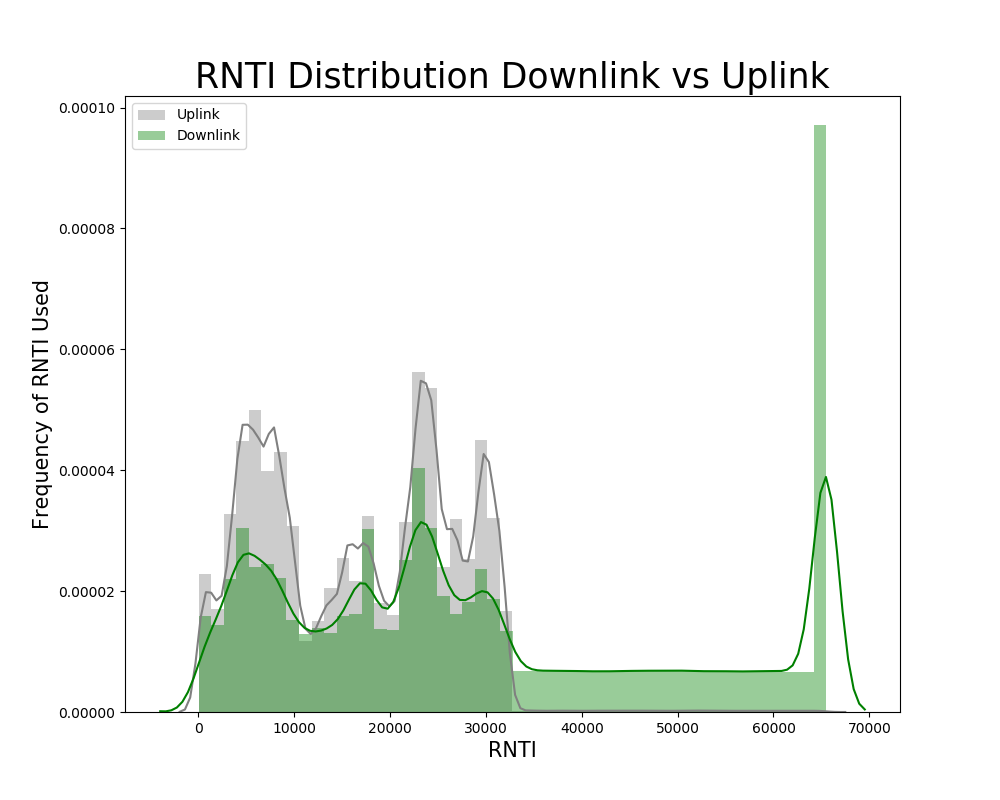

In [9]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'rnti'] , color='gray',label='Uplink')
ax=sns.distplot(df.loc[(df['direction'] == 1),'rnti'] , color='g', label='Downlink')
plt.title('RNTI Distribution Downlink vs Uplink', fontsize = 25)
plt.ylabel("Frequency of RNTI Used", fontsize = 15)
plt.xlabel("RNTI", fontsize = 15)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


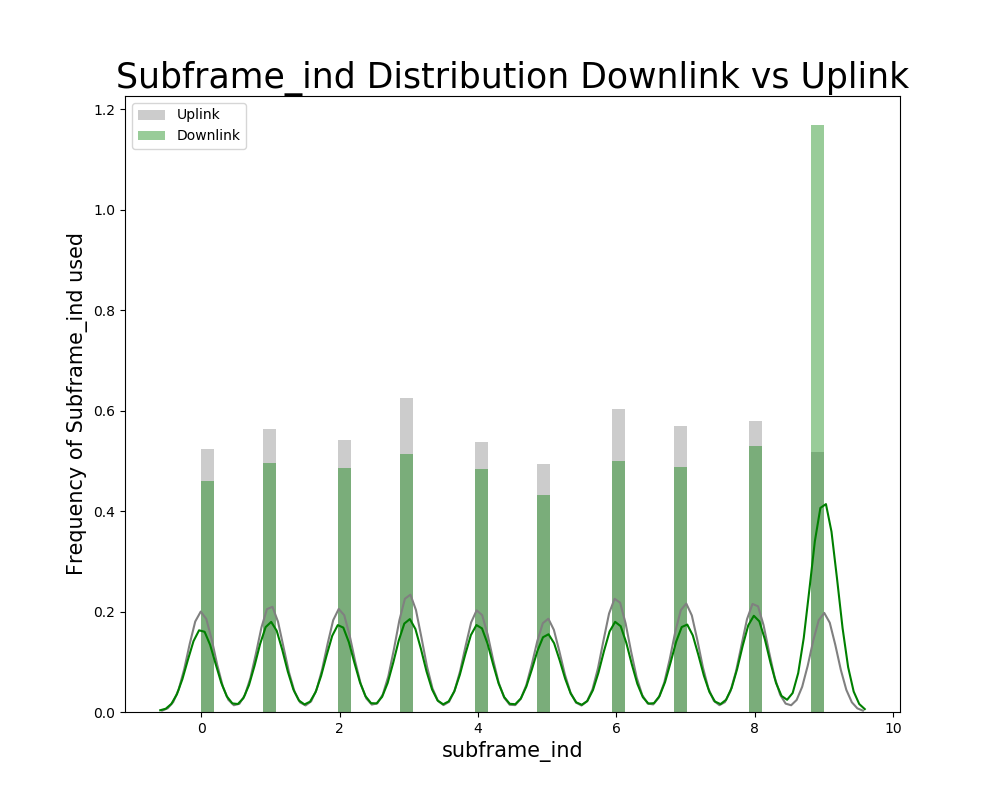

In [10]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'subframe_ind'] , color='gray',label='Uplink')
ax=sns.distplot(df.loc[(df['direction'] == 1),'subframe_ind'] , color='g', label='Downlink')
plt.title('Subframe_ind Distribution Downlink vs Uplink', fontsize = 25)
plt.ylabel("Frequency of Subframe_ind used", fontsize = 15)
plt.xlabel("subframe_ind", fontsize = 15)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


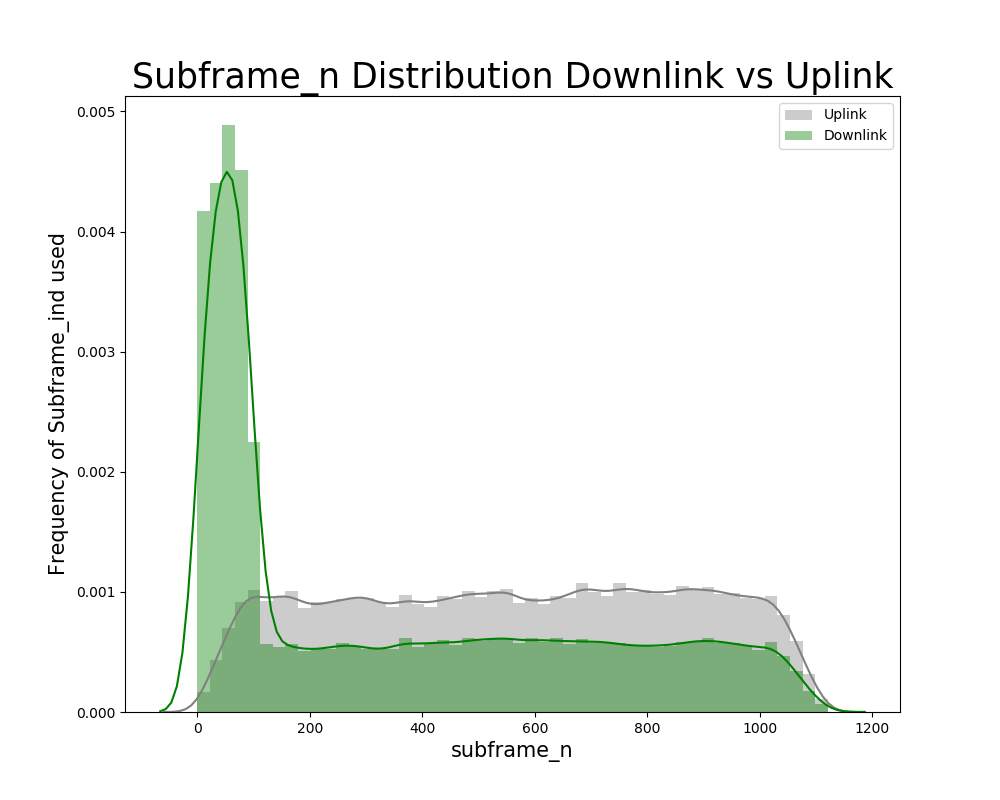

In [11]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'subframe_n'] , color='gray',label='Uplink')
ax=sns.distplot(df.loc[(df['direction'] == 1),'subframe_n'] , color='g', label='Downlink')
plt.title('Subframe_n Distribution Downlink vs Uplink', fontsize = 25)
plt.ylabel("Frequency of Subframe_ind used", fontsize = 15)
plt.xlabel("subframe_n", fontsize = 15)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


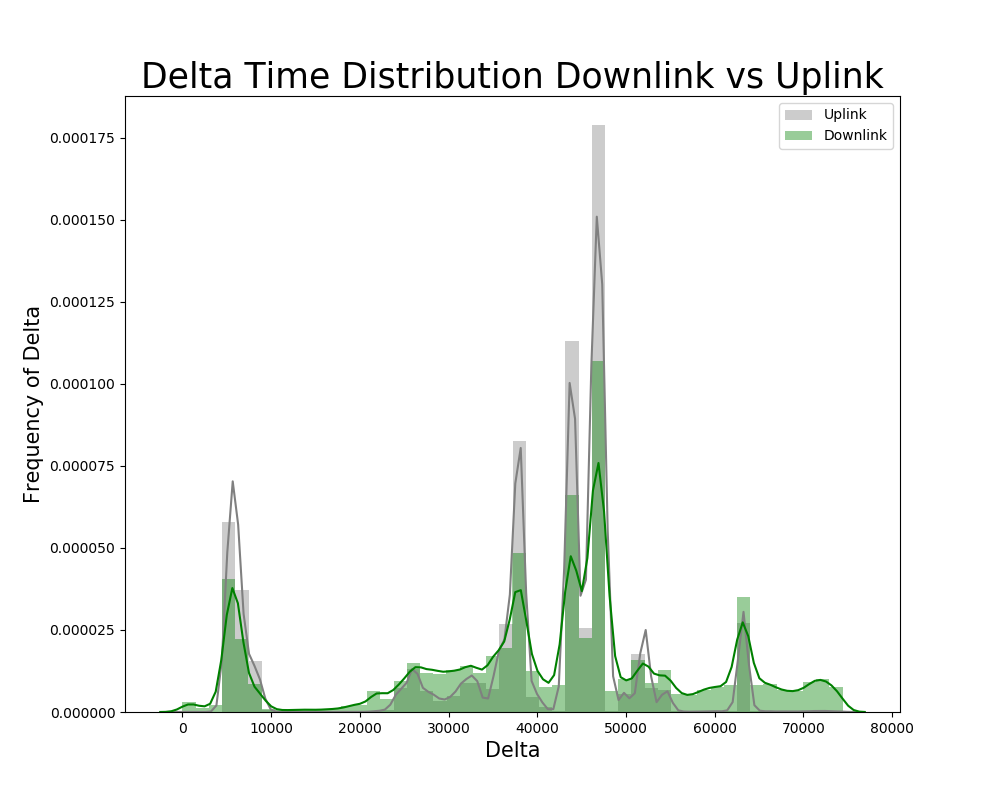

In [12]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'date_delta'] , color='gray',label='Uplink')
ax=sns.distplot(df.loc[(df['direction'] == 1),'date_delta'] , color='g', label='Downlink')
plt.title('Delta Time Distribution Downlink vs Uplink', fontsize = 25)
plt.ylabel("Frequency of Delta", fontsize = 15)
plt.xlabel("Delta", fontsize = 15)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


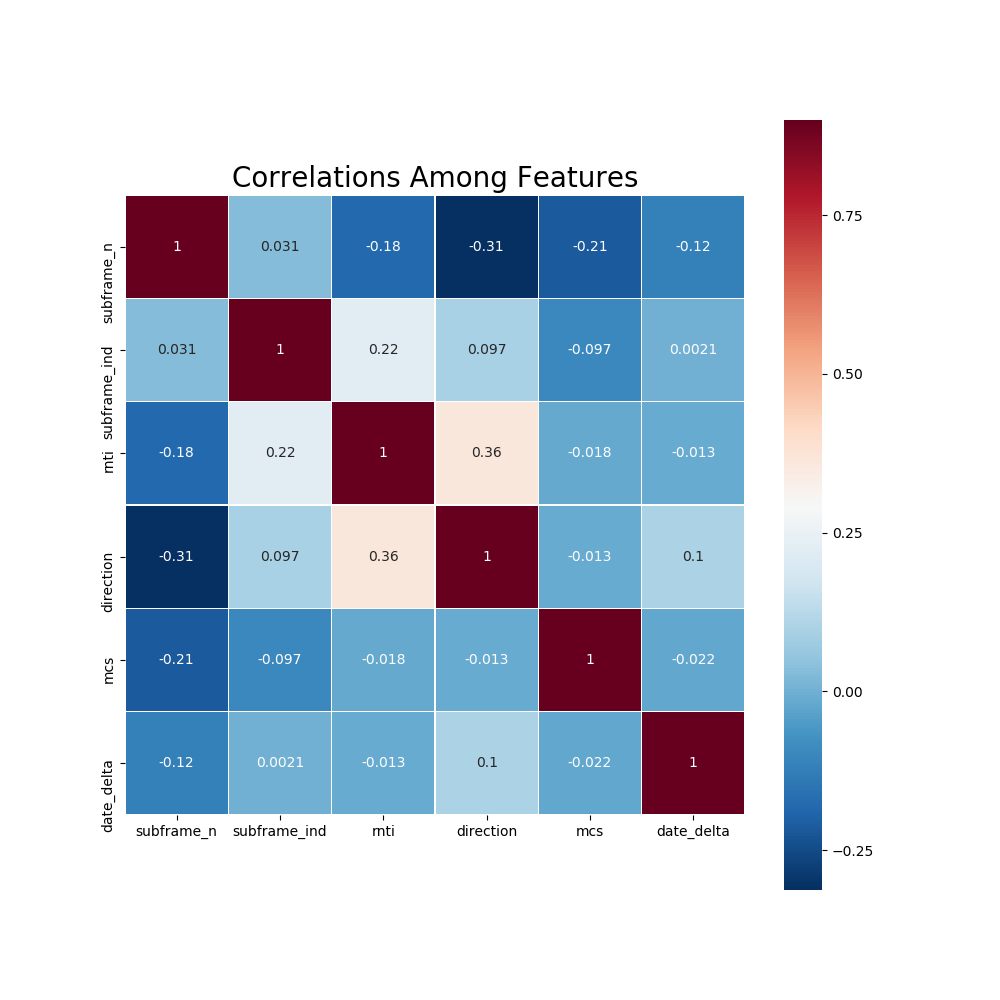

In [13]:
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# User identification

In [6]:
# rnti is renewed only when 10 seconds pass
delta_rnti_renewal = 10

# list where single dataframe for each user is saved
users = []
count = 0


# structure where on first column the index is set to 1 when rnti has been found 
# and the second column save the index of users and last time lists
# third column have saved the timing of last message from that rnti
current_users = np.zeros((65536,3), dtype = np.int)

# tqdm progress bar
with tqdm(total=len(df)) as pbar:
    for index, row in df.iterrows():
        # if already found user
        if current_users[row.rnti,0]:
            # if the current row is generated by the same rnti because the date is nearer than 10s
            if row.date_delta < current_users[row.rnti,2] + delta_rnti_renewal:
                # already existing user so append the current row 
                users.append(current_users[row.rnti,1])
                # save the last timestep
                current_users[row.rnti,2] = row.date_delta

            else:
                # user found but the rnti has been renewed so append new data
                
                users.append(count)
                current_users[row.rnti,2] = row.date_delta

                current_users[row.rnti,1] = count
                count += 1
        else:
            # user not found so flag the rnti index and append the new data
            users.append(count)

            current_users[row.rnti,2] = row.date_delta

            current_users[row.rnti,0] = 1
            current_users[row.rnti,1] = count
            count += 1
        pbar.update(1)


print('Found {} users'.format(len(set(users))))
df['user'] = users

100%|██████████| 2249577/2249577 [03:53<00:00, 9620.79it/s]


Found 472246 users


In [7]:
a = np.array(df)
utenti = [[] for _ in range(np.max(a[:,-1])+1)]
for row in tqdm(a):
    utenti[row[-1]].append(row[:-1])

100%|██████████| 2249577/2249577 [00:02<00:00, 986110.28it/s] 


In [8]:
eligible_users = []
for utente in tqdm(utenti):
    if len(utente) > 50:
        eligible_users.append(np.array(utente))
len(eligible_users)

100%|██████████| 472246/472246 [00:00<00:00, 596135.93it/s]


3949

In [ ]:
# First message selection
first_messages = []
columns =  ['dates','subframe_n','subframe_ind','rnti','direction','mcs']
for i in tqdm(eligible_users):
    first_messages.append(i[0])

first_messages = pd.DataFrame(first_messages, columns = columns)

In [ ]:
def find_n_components(df, cv_types, n_components_range):
    score = []
    best_silhouette = -1

    lowest_bic = np.infty
    bic = []   
    
    for cv_type in cv_types:
        for n_components in tqdm(n_components_range):

            gm = GaussianMixture(n_components=n_components,init_params='kmeans',covariance_type=cv_type)
            gm.fit(df)

            gmm = gm.predict(df)

            bic.append(gm.bic(df))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm_bic = gm

            score.append(silhouette_score(df, gmm))
            if score[-1] > best_silhouette:
                best_score = score[-1]
                best_gmm_silhouette = gm
                
    return (-np.array(score), best_gmm_silhouette), (np.array(bic), best_gmm_bic)

In [ ]:
cv_types = ['full']#['spherical', 'tied', 'diag', 'full']
n_components_range = range(2, 20)
(score, best_gmm_silhouette), (bic, best_gmm_bic) = find_n_components(first_messages, cv_types, n_components_range)

color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
# Plot the Silhouette scores
plt.figure(figsize=(10, 15))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, score[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([score.min() * 1.01 - .5 * score.max(), score.max()+.3])
plt.title('Silhouette score per model')
xpos = np.mod(score.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(score.argmin() / len(n_components_range)) +1
plt.text(xpos, score.min() * 0.97 + .03 * score.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 2)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range)) +1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.show()

In [ ]:
plt.figure()
predicted = best_gmm_silhouette.predict(first_messages)
plt.hist(predicted, bins=best_gmm_silhouette.n_components)
plt.show()

# Cluster

In [ ]:
y = df['mcs'].astype('int32')
x = df.loc[:, (df.columns != 'mcs')].astype('int32')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [ ]:
km = KMeans(nclust)
km.fit(X_train)

kmeans = pd.DataFrame(km.predict(X_train))

In [ ]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['rnti'],X_train['date_delta'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('RNTI')
ax.set_ylabel('date_delta')
plt.colorbar(scatter)
plt.show()

In [ ]:
gm = GaussianMixture(n_components=nclust,init_params='kmeans')
gm.fit(X_train)

gmm = pd.DataFrame(gm.predict(X_train))

In [ ]:
np.min(np.array(gmm))

In [ ]:
#Plotting the cluster obtained using GMM
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['rnti'],X_train['date_delta'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering')
ax.set_xlabel('RNTI')
ax.set_ylabel('date_delta')
plt.colorbar(scatter)
plt.show()

In [ ]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=5000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
label = ms.fit_predict(X_train)

mss = pd.DataFrame(label)

In [ ]:
#Plotting the cluster obtained using GMM
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['rnti'],X_train['date_delta'],
                     c=mss[0],s=50)
ax.set_title('Mean Shift Clustering')
ax.set_xlabel('RNTI')
ax.set_ylabel('date_delta')
plt.colorbar(scatter)
plt.show()

In [ ]:
X_train.insert((X_train.shape[1]),'kmeans',np.array(kmeans))
X_train.insert((X_train.shape[1]),'gmm',np.array(gmm))
X_train.insert((X_train.shape[1]),'mshift',np.array(mss))

kmeans = pd.DataFrame(km.predict(X_test))
gmm = pd.DataFrame(gm.predict(X_test))
mss = pd.DataFrame(ms.predict(X_test))
X_test.insert((X_test.shape[1]),'kmeans',np.array(kmeans))
X_test.insert((X_test.shape[1]),'gmm',np.array(gmm))
X_test.insert((X_test.shape[1]),'mshift',np.array(mss))

In [ ]:
X_train.head()

# Regression
This part has been used to investigate the features importance

In [ ]:
from sklearn import metrics


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.linear_model import ElasticNet, Lasso
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from mlxtend.regressor import StackingRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 300, verbose = 1, n_jobs = -1, max_depth = 20)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RandomForest Features')
plt.tight_layout()
plt.show()

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=400,
                              learning_rate=0.1, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.9,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)
y_pred = model_lgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,y_train)
y_pred = ENet.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=400, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5, verbose = 1)
GBoost.fit(X_train,y_train)
y_pred = GBoost.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=42)
regr_2.fit(X_train,y_train)
y_pred = regr_2.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
rf_class = RandomForestRegressor(n_estimators = 300, n_jobs = -1, max_depth = 20)
stacked_averaged_models = StackingRegressor(regressors=[model_lgb, GBoost, model_xgb, ENet, rf, regr_2], meta_regressor=rf_class, use_features_in_secondary = True, store_train_meta_features = True, verbose = 3)


stacked_averaged_models.fit(X_train,y_train)
y_pred = stacked_averaged_models.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

A visual inspection of the regression, this is a non-causal system because use the data gathered on the instant of prediction

In [ ]:
ind = list(range(300))
plt.subplots(figsize = (20,12))
plt.plot(np.array(y_test)[ind], label = 'test')
plt.plot(y_pred[ind], label = 'pred')
plt.legend()
plt.show()

In [ ]:
# get the data

min_len = 15

h, _ = np.histogram(users, bins=np.max(users))
pos = h > min_len
u = [i for i, x in enumerate(pos) if x]

data = []

for rnti in u:
    data.append(df['mcs'][df['user']==rnti].values)
    
print('Number of useful sequences:', len(data))

In [ ]:
import scipy.stats as st
from sklearn import preprocessing, decomposition
import warnings
warnings.filterwarnings('ignore')

def compute_features(sequence):
    
    features = []
    
    # this is adding the first 4 order moments (mean, variance, and higher moments)
    for i in range(4):
        features.append(st.kstat(sequence, i+1))
    
    #features.append(np.std(sequence))
    #features.append(np.max(sequence))
    #features.append(np.min(sequence))
    features.append(st.entropy(sequence))
    features.append(st.kurtosis(sequence))
    features.append(st.skew(sequence))
    #features.append(st.gmean(sequence))
    features.append(st.variation(sequence))
    features.append(st.iqr(sequence))
    features.append(st.sem(sequence))
    features.append(st.shapiro(sequence)[0])
    
    return np.array(features)


# compute the features
num_features = 11
feat = np.zeros((len(data), num_features))

for i in range(len(data)):
    feat[i,:] = compute_features(data[i])
    
feat[np.isnan(feat)] = 0
    
# normalize features
# consider using L2 norm
#norm_feat = preprocessing.normalize(feat, axis=0, norm='max')
norm_feat = preprocessing.scale(feat)

# do the PCA
pca = decomposition.PCA()
reduced = pca.fit_transform(norm_feat)

var = pca.explained_variance_ratio_
print('Variance explained by the components:', var)

In [ ]:
# plot of the first three components
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

rcParams['axes.titlepad'] = 25

fig = plt.figure()
ax = Axes3D(fig)

fin_var = var[0] + var[1] + var[2]
title = 'First three components, variance explained: ' + str(np.around(fin_var, 2))
ax.scatter(reduced[:,0], reduced[:,1], reduced[:,3])
plt.title(title)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

In [ ]:
# choose nr of components for PCA
# elbow method

plt.figure()
plt.title('Elbow method to select the optimal number of components')
plt.plot(var, '^-')
plt.show()

In [ ]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GMM

n_components = 4
clusters = 2

X = np.zeros((feat.shape[0], n_components))
for i in range(feat.shape[0]):
    X[i,:] = reduced[i,:n_components]
    
# standardize data to feed clustering
#X = preprocessing.scale(X, axis=0)

kmeans = KMeans(n_clusters=clusters).fit(X)
ms = MeanShift().fit(X)
gmm = GMM(n_components=clusters).fit(X)
labels_gmm = gmm.predict(X)
labels_km = kmeans.labels_
labels_ms = ms.labels_

title = 'Clustering in ' + str(clusters) + ' classes of the previous features: '

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels_km)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(title + 'KMeans')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,3], c=labels_km)
plt.title(title + 'KMeans')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels_ms)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MeanShift clusters of the previous features.')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,3], c=labels_ms)
plt.title('MeanShift clusters of the previous features.')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels_gmm)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(title + 'GMM')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,3], c=labels_gmm)
plt.title(title + 'GMM')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

n = np.max(labels_ms) + 1
print('Number of clusters selected by MeanShift:', n)

In [ ]:
def find_class(data, labels, target):
    
    usr = []
    
    pos = labels == target
    u = [i for i, x in enumerate(pos) if x]
    
    for idx in u:
        usr.append(data[idx])
        
    return usr

def plot_user_mcs(sequence, target):
    
    title = 'MCS sequence, user of class ' + str(target)
    
    plt.figure()
    plt.plot(sequence, 'o-')
    plt.title(title)
    plt.show()
    
    return


usr1 = find_class(data, labels_gmm, 0)
usr2 = find_class(data, labels_gmm, 1)
#usr3 = find_class(data, labels_gmm, 2)

plot_user_mcs(usr1[np.random.randint(0, len(usr1)-1)], 1)
plot_user_mcs(usr2[np.random.randint(0, len(usr2)-1)], 2)
#plot_user_mcs(usr3[np.random.randint(0, len(usr3)-1)], 3)